### Importación de datos



In [1]:
# Instalar pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # Importar la libreria de pandas como pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [9]:
import matplotlib.pyplot as plt # Importar libreria matplotlib como plt

#1. Análisis de facturación



In [6]:
# Calcular ingresos totales por tienda
ingreso_tienda1 = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f'ANALISIS DE FACTURACIÓN')
print(f'--------------------------')
print(f'Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}')
print(f'Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}')
print(f'Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}')
print(f'Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}')

ANALISIS DE FACTURACIÓN
--------------------------
Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


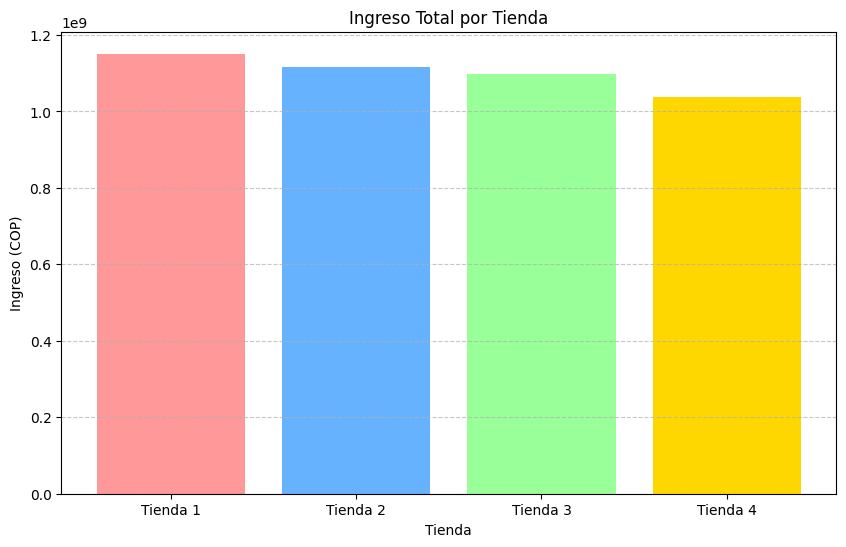

In [10]:
# Datos para gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(tiendas, ingresos, color=['#FF9999','#66B2FF','#99FF99','#FFD700'])
plt.title('Ingreso Total por Tienda')
plt.ylabel('Ingreso (COP)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Ventas por categoría

In [7]:
def resumen_por_categoria(df, nombre_tienda):
    # Agrupar por categoría y contar cantidad de productos vendidos
    agrupado = df.groupby("Categoría del Producto").size().reset_index(name='Cantidad')
    # Ordenar por cantidad descendente
    agrupado = agrupado.sort_values(by="Cantidad", ascending=False)
    # Mostrar top 5 categorías
    print(f"\nTop 5 categorías por número de ventas - {nombre_tienda}:")
    print(agrupado.head(5))
    return agrupado

# Aplicar función a cada tienda
categoria_t1 = resumen_por_categoria(tienda, "Tienda 1")
categoria_t2 = resumen_por_categoria(tienda2, "Tienda 2")
categoria_t3 = resumen_por_categoria(tienda3, "Tienda 3")
categoria_t4 = resumen_por_categoria(tienda4, "Tienda 4")


Top 5 categorías por número de ventas - Tienda 1:
  Categoría del Producto  Cantidad
7                Muebles       465
3           Electrónicos       448
5               Juguetes       324
2      Electrodomésticos       312
1   Deportes y diversión       284

Top 5 categorías por número de ventas - Tienda 2:
  Categoría del Producto  Cantidad
7                Muebles       442
3           Electrónicos       422
5               Juguetes       313
2      Electrodomésticos       305
1   Deportes y diversión       275

Top 5 categorías por número de ventas - Tienda 3:
  Categoría del Producto  Cantidad
7                Muebles       499
3           Electrónicos       451
5               Juguetes       315
2      Electrodomésticos       278
1   Deportes y diversión       277

Top 5 categorías por número de ventas - Tienda 4:
  Categoría del Producto  Cantidad
7                Muebles       480
3           Electrónicos       451
5               Juguetes       338
1   Deportes y diversión  

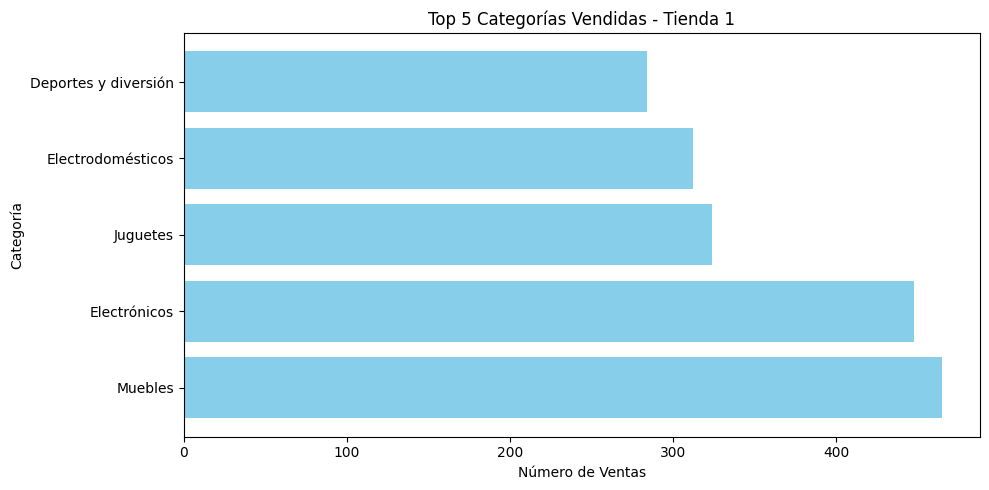

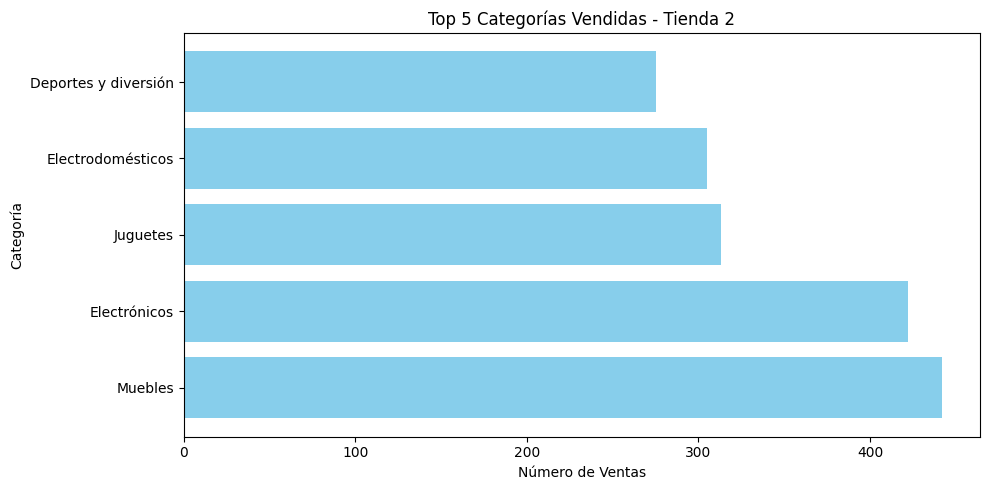

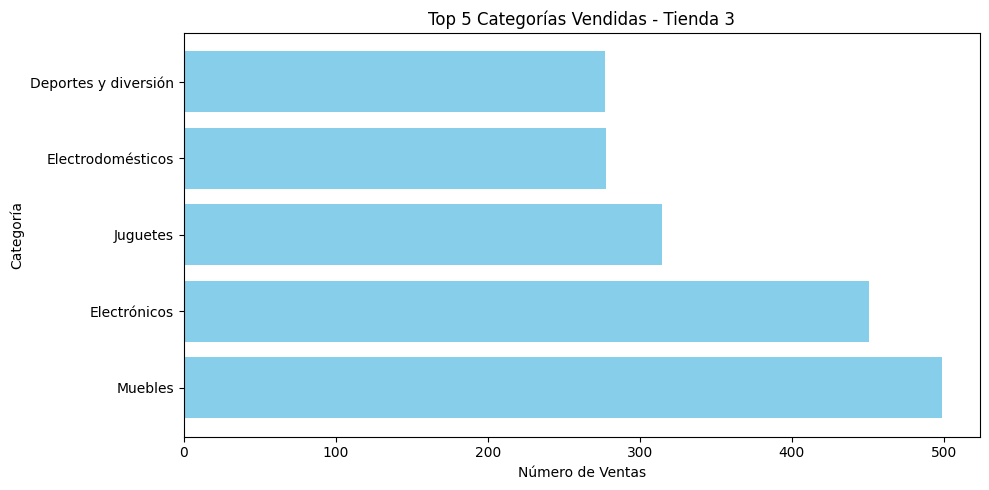

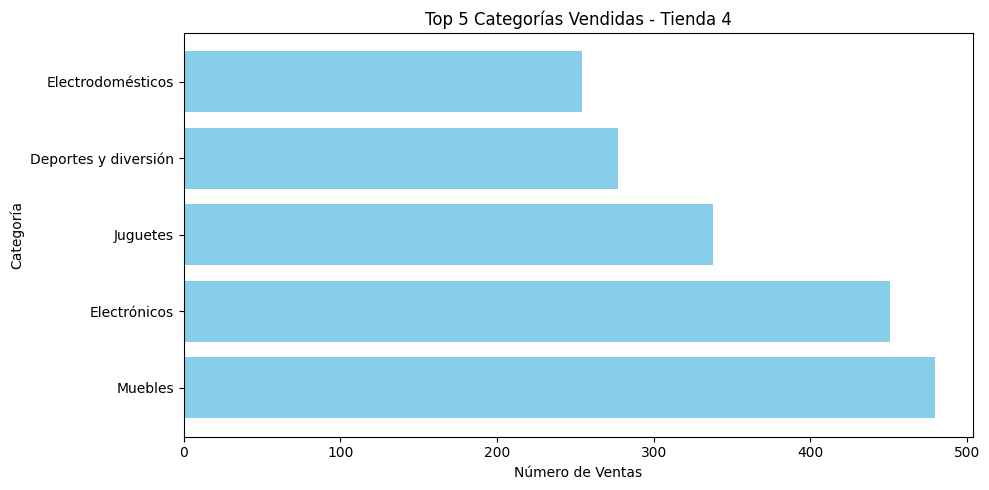

In [11]:
def graficar_top_categorias(df, nombre_tienda):
    top5 = df.head(5)
    plt.figure(figsize=(10, 5))
    plt.barh(top5['Categoría del Producto'], top5['Cantidad'], color='skyblue')
    plt.title(f'Top 5 Categorías Vendidas - {nombre_tienda}')
    plt.xlabel('Número de Ventas')
    plt.ylabel('Categoría')
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_top_categorias(categoria_t1, "Tienda 1")
graficar_top_categorias(categoria_t2, "Tienda 2")
graficar_top_categorias(categoria_t3, "Tienda 3")
graficar_top_categorias(categoria_t4, "Tienda 4")

# 3. Calificación promedio de la tienda


In [13]:
# Calcular calificación promedio por tienda
calificacion_promedio_t1 = tienda['Calificación'].mean()
calificacion_promedio_t2 = tienda2['Calificación'].mean()
calificacion_promedio_t3 = tienda3['Calificación'].mean()
calificacion_promedio_t4 = tienda4['Calificación'].mean()

# Mostrar resultados

print(f'CALIFICACIÓN PROMEDIO DE LA TIENDA')
print(f'-----------------------------------')
print(f"Calificación promedio Tienda 1: {calificacion_promedio_t1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_promedio_t2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_promedio_t3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_promedio_t4:.2f}")

CALIFICACIÓN PROMEDIO DE LA TIENDA
-----------------------------------
Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


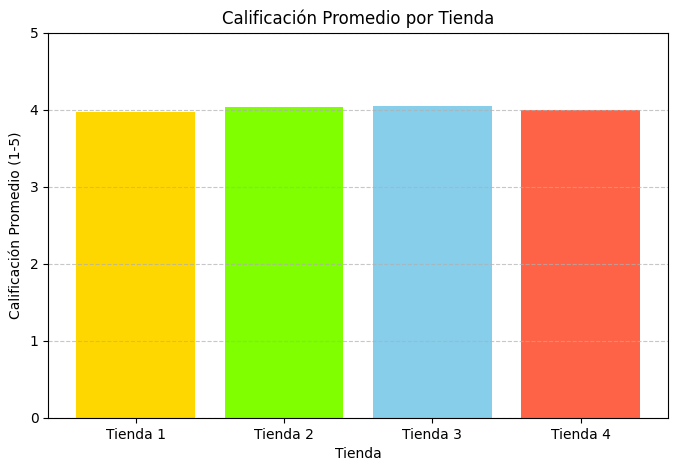

In [14]:
# Datos para gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [
    calificacion_promedio_t1,
    calificacion_promedio_t2,
    calificacion_promedio_t3,
    calificacion_promedio_t4
]

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(tiendas, calificaciones, color=['#FFD700','#7FFF00','#87CEEB','#FF6347'])
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.xlabel('Tienda')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Productos más y menos vendidos

In [15]:
# Función para obtener los productos más y menos vendidos
def analizar_productos(df, nombre_tienda):
    # Contar cantidad de ventas por producto
    conteo_productos = df['Producto'].value_counts().reset_index()
    conteo_productos.columns = ['Producto', 'Cantidad de Ventas']
    
    # Obtener top 5 más vendidos
    mas_vendidos = conteo_productos.head(5)
    
    # Obtener últimos 5 (menos vendidos)
    menos_vendidos = conteo_productos.tail(5)
    
    print(f"\n--- {nombre_tienda} ---")
    print("\nTop 5 productos más vendidos:")
    print(mas_vendidos.to_string(index=False))
    
    print("\nTop 5 productos menos vendidos:")
    print(menos_vendidos.to_string(index=False))
    
    return mas_vendidos, menos_vendidos

# Aplicar función a cada tienda
mas_vendidos_t1, menos_vendidos_t1 = analizar_productos(tienda, "Tienda 1")
mas_vendidos_t2, menos_vendidos_t2 = analizar_productos(tienda2, "Tienda 2")
mas_vendidos_t3, menos_vendidos_t3 = analizar_productos(tienda3, "Tienda 3")
mas_vendidos_t4, menos_vendidos_t4 = analizar_productos(tienda4, "Tienda 4")


--- Tienda 1 ---

Top 5 productos más vendidos:
        Producto  Cantidad de Ventas
      Microondas                  60
   TV LED UHD 4K                  60
         Armario                  60
Secadora de ropa                  58
   Mesa de noche                  56

Top 5 productos menos vendidos:
                   Producto  Cantidad de Ventas
Ciencia de datos con Python                  39
                  Pandereta                  36
            Olla de presión                  35
  Auriculares con micrófono                  33
               Celular ABXY                  33

--- Tienda 2 ---

Top 5 productos más vendidos:
                 Producto  Cantidad de Ventas
Iniciando en programación                  65
               Microondas                  62
                  Batería                  61
        Guitarra acústica                  58
                Pandereta                  58

Top 5 productos menos vendidos:
       Producto  Cantidad de Ventas
    Auriculare

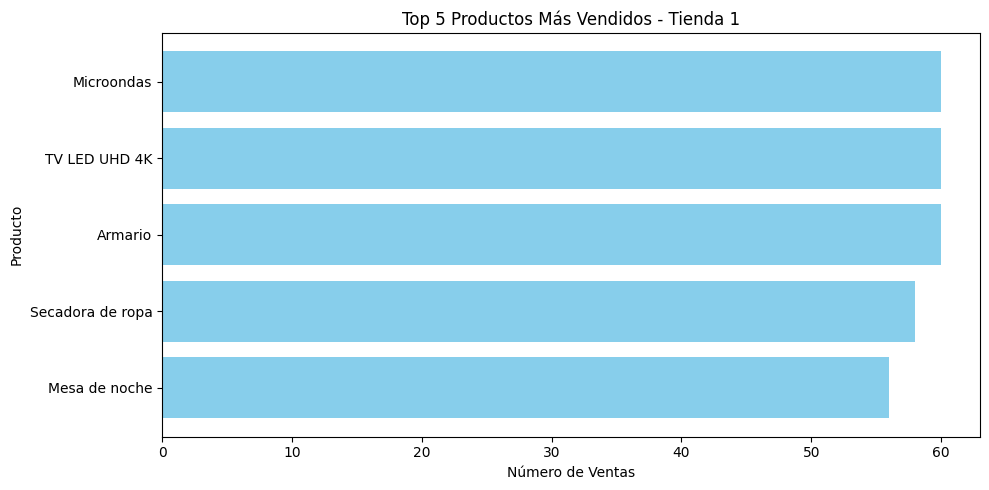

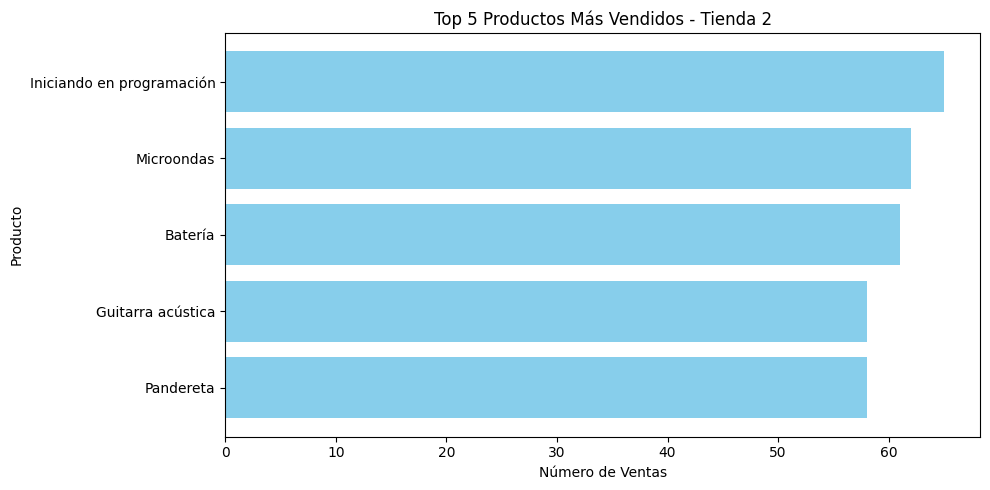

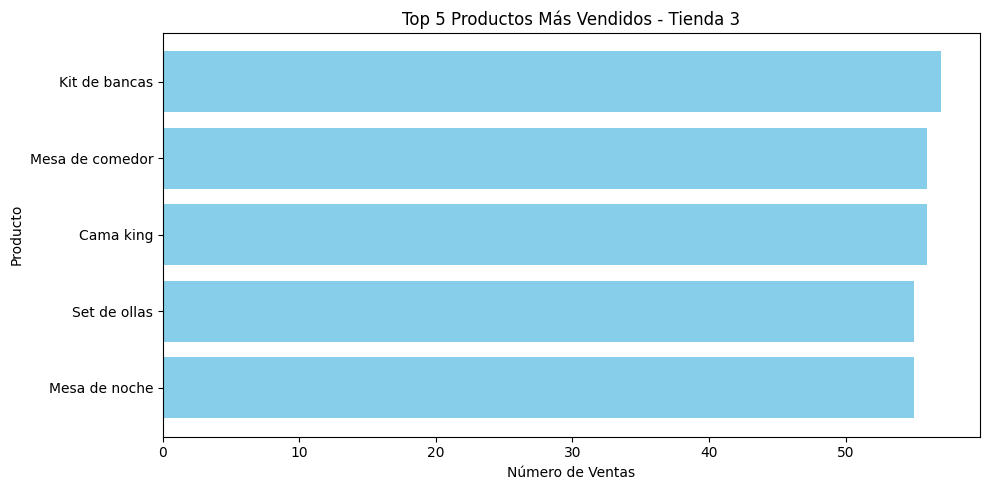

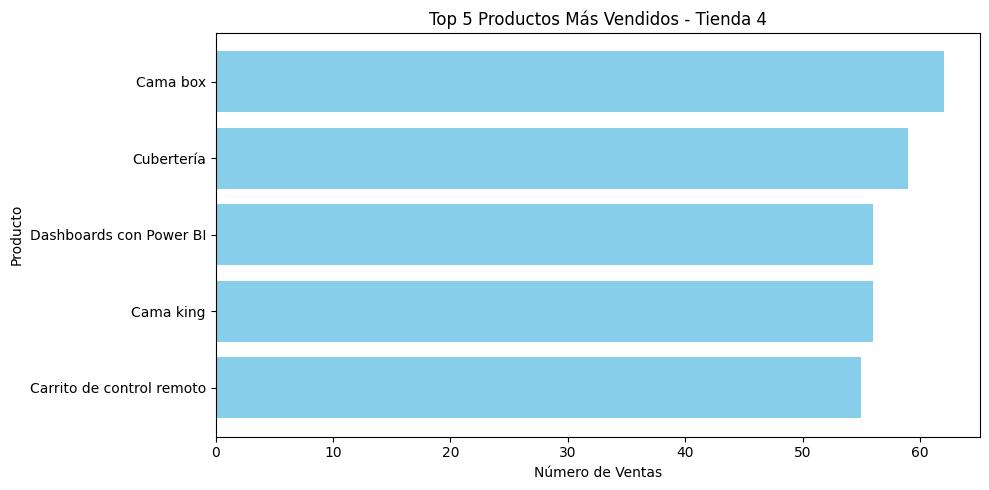

In [16]:
def graficar_mas_vendidos(df, nombre_tienda):
    plt.figure(figsize=(10, 5))
    plt.barh(df['Producto'], df['Cantidad de Ventas'], color='skyblue')
    plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}')
    plt.xlabel('Número de Ventas')
    plt.ylabel('Producto')
    plt.gca().invert_yaxis()  # Para mostrar el más vendido arriba
    plt.tight_layout()
    plt.show()

# Graficar para cada tienda
graficar_mas_vendidos(mas_vendidos_t1, "Tienda 1")
graficar_mas_vendidos(mas_vendidos_t2, "Tienda 2")
graficar_mas_vendidos(mas_vendidos_t3, "Tienda 3")
graficar_mas_vendidos(mas_vendidos_t4, "Tienda 4")

# 5. Envío promedio por tienda

In [17]:
# Calcular costo de envío promedio por tienda
costo_envio_promedio_t1 = tienda['Costo de envío'].mean()
costo_envio_promedio_t2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_t3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_t4 = tienda4['Costo de envío'].mean()

# Mostrar resultados
print(f'ENVÍO PROMEDIO POR TIENDA')
print(f'-----------------------------------')
print(f"Costo de envío promedio Tienda 1: ${costo_envio_promedio_t1:.2f}")
print(f"Costo de envío promedio Tienda 2: ${costo_envio_promedio_t2:.2f}")
print(f"Costo de envío promedio Tienda 3: ${costo_envio_promedio_t3:.2f}")
print(f"Costo de envío promedio Tienda 4: ${costo_envio_promedio_t4:.2f}")

ENVÍO PROMEDIO POR TIENDA
-----------------------------------
Costo de envío promedio Tienda 1: $26018.61
Costo de envío promedio Tienda 2: $25216.24
Costo de envío promedio Tienda 3: $24805.68
Costo de envío promedio Tienda 4: $23459.46


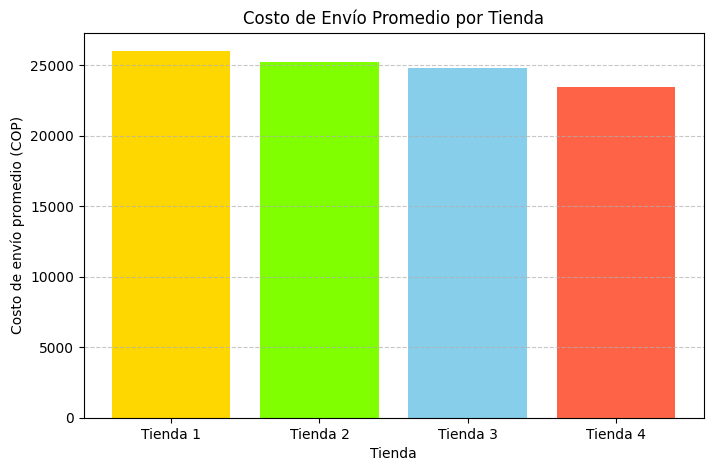

In [18]:
# Datos para gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [
    costo_envio_promedio_t1,
    costo_envio_promedio_t2,
    costo_envio_promedio_t3,
    costo_envio_promedio_t4
]

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(tiendas, costos_envio, color=['#FFD700','#7FFF00','#87CEEB','#FF6347'])
plt.title('Costo de Envío Promedio por Tienda')
plt.ylabel('Costo de envío promedio (COP)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()